In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sentencepiece import SentencePieceTrainer
from sentencepiece import SentencePieceProcessor
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import joblib
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [114]:
data = pd.read_csv('data.csv')

In [115]:
data

,제목,내용,청원수,카테고리,청원시작일,청원마감일,청원인
0,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,오늘 검거되었다고 합니다 타인의 수치심과 어린 학생들을 지옥으로 몰아넣은 가해자를...,2715626,안전/환경,청원시작2020-03-18,청원마감2020-04-17,청원인naver - ***
1,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,"안녕하세요, 텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행...",2026252,안전/환경,청원시작2020-03-20,청원마감2020-04-19,청원인naver - ***
2,자유 한국당 정당해산 청원,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원...,1831900,정치개혁,청원시작2019-04-22,청원마감2019-05-22,청원인kakao - ***
3,문재인 대통령님을 응원 합니다!,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국...,1504597,기타,청원시작2020-02-26,청원마감2020-03-27,청원인naver - ***
4,문재인 대통령 탄핵을 촉구합니다.,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코...,1469023,정치개혁,청원시작2020-02-04,청원마감2020-03-05,청원인naver - ***
...,...,...,...,...,...,...,...
32422,국회출석률에따라 월급주세요,동네 입주자대표회의도 출석률에따라 대표회의비를 주고 있는곳이 있습니다 나라에 중요...,85,정치개혁,청원시작2018-04-12,청원마감2018-05-12,청원인naver - ***
32423,국회의원 전수조사,"전현직 국회의원 외국출장, 정치헌금 사용에 대해 전수조사 해주십시오.",85,정치개혁,청원시작2018-04-17,청원마감2018-05-17,청원인naver - ***
32424,외국 국적자 조현민 해외 추방해야합니가,외국 시민권자가 아버지의 권한에 힘입어서 내국국적의 수많은 사람들이 고통을 당해서...,85,인권/성평등,청원시작2018-04-24,청원마감2018-05-24,청원인naver - ***
32425,대통령님께 욕한 조원진 강력히 규탄한다(이곳으로 몰아 주십시요),1.친박 극우자중 조원진 국회의원을 규탄 합니다 현 대통령을 이 미친 xx라고 욕...,85,정치개혁,청원시작2018-05-01,청원마감2018-05-31,청원인naver - ***


In [117]:
data['카테고리'].value_counts()

정치개혁           3993
인권/성평등         3672
기타             3494
보건복지           3238
육아/교육          3143
안전/환경          2948
교통/건축/국토       2357
행정             1767
문화/예술/체육/언론    1761
외교/통일/국방       1593
경제민주화          1257
일자리            1178
반려동물            696
미래              633
저출산/고령화대책       265
성장동력            247
농산어촌            185
Name: 카테고리, dtype: int64

In [4]:
data['sentiment'] = data['청원수'].map(lambda x: 1 if x> 1000 else 0)

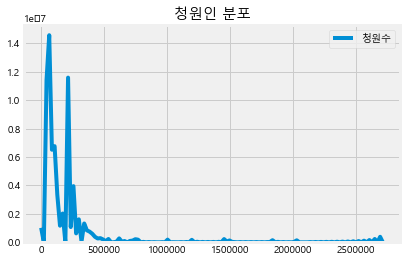

In [5]:
sns.kdeplot(data['청원수'])
plt.title("청원인 분포")
plt.show()

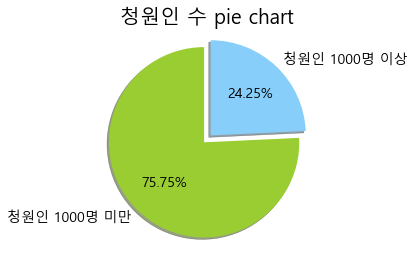

In [6]:
group_names = [ '청원인 1000명 미만','청원인 1000명 이상']


group_colors = ['yellowgreen', 'lightskyblue']

group_explodes = (0.1, 0) # explode 1st slice


plt.pie(data['sentiment'].value_counts(), 

        explode=group_explodes, 

        labels=group_names, 

        colors=group_colors, 

        autopct='%1.2f%%', # second decimal place

        shadow=True, 

        startangle=90,

        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('청원인 수 pie chart', fontsize=20)

plt.show()



In [7]:
# 더 극적인 비교를 위해 data의 양극단을 사용한다!!

In [8]:
data.iloc[:5000,:].head()

,제목,내용,청원수,카테고리,청원시작일,청원마감일,청원인,sentiment
0,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,오늘 검거되었다고 합니다 타인의 수치심과 어린 학생들을 지옥으로 몰아넣은 가해자를...,2715626,안전/환경,청원시작2020-03-18,청원마감2020-04-17,청원인naver - ***,1
1,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,"안녕하세요, 텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행...",2026252,안전/환경,청원시작2020-03-20,청원마감2020-04-19,청원인naver - ***,1
2,자유 한국당 정당해산 청원,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원...,1831900,정치개혁,청원시작2019-04-22,청원마감2019-05-22,청원인kakao - ***,1
3,문재인 대통령님을 응원 합니다!,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국...,1504597,기타,청원시작2020-02-26,청원마감2020-03-27,청원인naver - ***,1
4,문재인 대통령 탄핵을 촉구합니다.,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코...,1469023,정치개혁,청원시작2020-02-04,청원마감2020-03-05,청원인naver - ***,1


In [9]:
data.iloc[-5000:,:].head()

,제목,내용,청원수,카테고리,청원시작일,청원마감일,청원인,sentiment
27427,공공기관의 정규직 전환때문에 생계를 위협받고 있습니다.,안녕하십니까? 근로복지공단 콜센터 상담사로 근무 중인 서민입니다. 현재 저희 회사...,116,일자리,청원시작2018-12-13,청원마감2019-01-12,청원인naver - ***,0
27428,"이국종교수의 절규, 닥터헬기의 야간운행을 허용하라","시끄럽다고, 귀찮다고 사람이 죽는데 냅두라는것. 말이나 됩니까.",116,안전/환경,청원시작2018-11-10,청원마감2018-12-10,청원인naver - ***,0
27429,경피용BCG 예방접종,이제 생후 50일이 다되어가는 아이를 키우는 엄마입니다. 아이가 태어나서 한달안에...,116,보건복지,청원시작2018-11-08,청원마감2018-12-08,청원인naver - ***,0
27430,최저임금 보장도 안해주는 LG전자 서비스는 최저임금 보장해라!!!,수당제로 운영되고 있는 LG전자 서비스센타.... 고객이 없을 때는 손가락을 빨아...,116,기타,청원시작2018-11-14,청원마감2018-12-14,청원인naver - ***,0
27431,임신 계획 있으신분들... 내년으로 미루세요!,"오늘 출산장려금 250만원 준다고 발표했는데, 내년 10월 이후 출생한 산모에게만...",116,육아/교육,청원시작2018-11-28,청원마감2018-12-28,청원인twitter - ***,0


In [10]:
new_data = pd.concat([data.iloc[:5000,:],data.iloc[-5000:,:]],axis=0)

In [116]:
new_data.shape

(10000, 9)

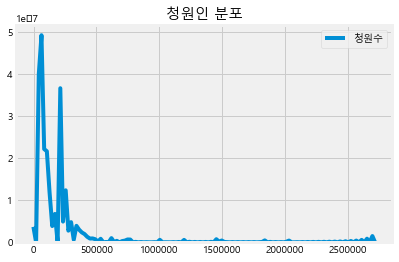

In [12]:
sns.kdeplot(new_data['청원수'])
plt.title("청원인 분포")
plt.show()

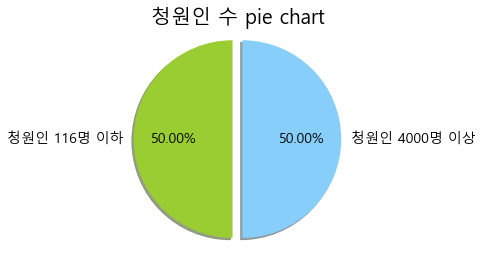

In [13]:
group_names = [ '청원인 116명 이하','청원인 4000명 이상']


group_colors = ['yellowgreen', 'lightskyblue']

group_explodes = (0.1, 0) # explode 1st slice


plt.pie(new_data['sentiment'].value_counts(), 

        explode=group_explodes, 

        labels=group_names, 

        colors=group_colors, 

        autopct='%1.2f%%', # second decimal place

        shadow=True, 

        startangle=90,

        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('청원인 수 pie chart', fontsize=20)

plt.show()



* baseline accuracy를 50%로 정하고, 청원참여인원이 높은 것과 낮은 것의 차이를 더 두드러지게 하기 위해서
양극단 값을 사용함

In [14]:
new_data['내용'] = new_data['내용'].map(lambda x: '내용없음' if len(x)<5 else x)
#공백인 문서에 내용 없음 삽입

In [15]:
new_data['내용'] = new_data['내용'].map(lambda x: np.nan if len(x)<5 else x)

# 전처리

In [18]:
import tensorflow as tf
new_data['내용'] = new_data['내용'].astype('str')

In [19]:
tk = tf.keras.preprocessing.text.Tokenizer(num_words=2000,oov_token = '<unk>')

tk.fit_on_texts(new_data['내용'])

In [20]:
seqs = tk.texts_to_sequences(new_data['내용'])

In [21]:
data = []
for seq in seqs:
    for i in range(0, len(seq) - 4):
        data.append((seq[i:i+4], seq[i+4]))

In [22]:
import random
random.shuffle(data)

In [23]:
xs = np.array([x for x, y in data])
ys = np.array([y for x, y in data])

In [24]:
NUM_WORD = tk.num_words + 1 

In [25]:
emb1 = tf.keras.layers.Embedding(
    input_dim=NUM_WORD,
    output_dim=8,
)
lm = tf.keras.Sequential([
    emb1,
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [26]:
lm.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
lm.fit(xs, ys, epochs=1,validation_split= 0.2, batch_size = 512)

Train on 1713588 samples, validate on 428397 samples
1713588/1713588 [==============================] - 6s 4us/sample - loss: -253018.0288 - accuracy: 0.5997 - val_loss: -901805.7354 - val_accuracy: 0.6006


In [28]:
# 문장이 너무 길어서 학습이 잘 안되는 문제 발생!
# gensim 의 요약 패키지를 사용해서 글을 요약함

In [29]:
def summarizee(x):
    summ_plot = ''
    try:
        if summarize(x,word_count=100) != '':
            summ_plot = summarize(x,word_count=100)
        else:
            summ_plot = x
            
    except:
        summ_plot = x
        
    return summ_plot

In [30]:
from gensim.summarization.summarizer import summarize

In [31]:
new_data['summarize_'] = new_data['내용'].map(lambda x: summarizee(x) )

In [32]:
new_data['내용'][3]

' 코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민건강을 위해 대통령님을 비롯한 대한민국 정부 각 부처의 모든 분들이 밤낮 없이 바이러스 퇴치에 온갖 힘을 쏟고 계십니다. 하지만 신천치 라는 생각치도 못한 사이비 종교의 무분별한 바이러스 확산으로 인해,코로나 19청정지역이었던 대한민국인 단 일주일 사이 급속도록 확진자들이 불어 나고 있으며,국민들 모두 힘들어 하는 상황 까지 오게 되었습니다. 정부의 협조 요청에도 묵묵부담으로 일삼고 있는 사이비 종교 신천지. 이러한 악 조건 속에서도 대통령님은 밤낮없이 오직 국민들의 안전을 위해 노력 하고 계시며, 신천지 바이러스의 근원지가 되어 버린 대구&경북 지역을 위해 무척이나 애쓰시고 계십니다. 수많은 가짜 뉴스가 대통령님 및 질병관리본부 그리고 대한민국 각 부처을 힘들게 하고 있지만 수많은 대한민국 국민들은 “문재인 대통령”님을 믿고 응원하고 있습니다. 이 어려운 시기는 대통령님과 함께 반드시 이겨낼 것이며, 대한민국 국민 대다수는 정부에 대한 신뢰로 함께 극복해나갈 거라 믿어 의심치 않습니다. 문재인 대통령님 언제나 응원 합니다!! 문재인 대통령님이 있는 대한민국은 반드시 이 어려운 상황을 극복 해나갈 것입니다.!! '

In [33]:
new_data['summarize_'][3]
# 청원의 주요내용이 잘 요약된 것을 확인할 수 있음

'코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다.\n하지만 국민건강을 위해 대통령님을 비롯한 대한민국 정부 각 부처의 모든 분들이 밤낮 없이 바이러스 퇴치에 온갖 힘을 쏟고 계십니다.\n하지만 신천치 라는 생각치도 못한 사이비 종교의 무분별한 바이러스 확산으로 인해,코로나 19청정지역이었던 대한민국인 단 일주일 사이 급속도록 확진자들이 불어 나고 있으며,국민들 모두 힘들어 하는 상황 까지 오게 되었습니다.\n이 어려운 시기는 대통령님과 함께 반드시 이겨낼 것이며, 대한민국 국민 대다수는 정부에 대한 신뢰로 함께 극복해나갈 거라 믿어 의심치 않습니다.\n문재인 대통령님 언제나 응원 합니다!!\n문재인 대통령님이 있는 대한민국은 반드시 이 어려운 상황을 극복 해나갈 것입니다.!!'

In [34]:
new_data.to_csv('new_data.csv')

In [35]:
tk = tf.keras.preprocessing.text.Tokenizer(num_words=2000,oov_token = '<unk>')

tk.fit_on_texts(new_data['summarize_'])

In [36]:
seqs = tk.texts_to_sequences(new_data['summarize_'])

In [37]:
# tokenizer 저장
joblib.dump(tk, 'tokenizer.pkl')

['tokenizer.pkl']

In [38]:
data = []
for seq in seqs:
    for i in range(0, len(seq) - 4):
        data.append((seq[i:i+4], seq[i+4]))

In [39]:
import random
random.shuffle(data)

xs = np.array([x for x, y in data])
ys = np.array([y for x, y in data])

NUM_WORD = tk.num_words + 1 

In [40]:
emb1 = tf.keras.layers.Embedding(
    input_dim=NUM_WORD,
    output_dim=8,
)
lm = tf.keras.Sequential([
    emb1,
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [41]:
lm.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [42]:
lm.fit(xs, ys, epochs=1,validation_split= 0.2,batch_size = 512)
# 요약하지 않았을 때보다 loss가 크게 개선 되었음

Train on 632157 samples, validate on 158040 samples
632157/632157 [==============================] - 3s 4us/sample - loss: -22423.9159 - accuracy: 0.6009 - val_loss: -84292.2256 - val_accuracy: 0.6000


In [43]:
e = emb1.embeddings.numpy()

In [44]:
np.savez('word-emb.npz', emb=e)

# wordcloud , 가중치 확인

In [45]:
stopword = []
with open('stopword_dict.txt','r', encoding='utf8') as f:
    for line in f.readlines():
        stopword.append(line)
        
stopwords = []
for i in stopword:
    stopwords.append(i.strip())

In [46]:
from konlpy.tag import Hannanum

tagger =Hannanum()

tv = TfidfVectorizer(max_features=1000, tokenizer=tagger.nouns, stop_words=stopwords)
#tv 생성

In [47]:
tfidf_max = tv.fit_transform(new_data['summarize_'].iloc[:5000])

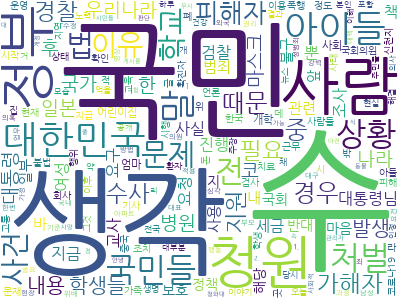

In [48]:
word_count = pd.DataFrame({
    '단어' : tv.get_feature_names(),
    '빈도' : tfidf_max.sum(axis=0).flat
})

word_count = word_count.sort_values('빈도',ascending=False)

count_dic = word_count.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path = 'C:/Windows/Fonts/NanumGothic.ttf',background_color='white',height=300,width=400)#객체지정 및 폰트 설정

cloud = wc.generate_from_frequencies(count_dic)

cloud.to_image()

In [49]:
tfidf_min = tv.fit_transform(new_data['summarize_'].iloc[-5000:])

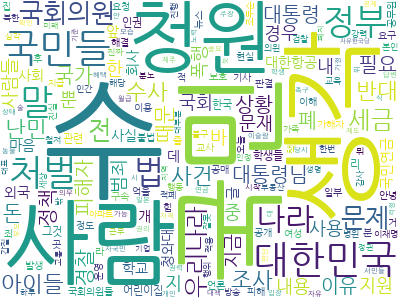

In [50]:
word_count = pd.DataFrame({
    '단어' : tv.get_feature_names(),
    '빈도' : tfidf_min.sum(axis=0).flat
})

word_count = word_count.sort_values('빈도',ascending=False)

count_dic = word_count.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path = 'C:/Windows/Fonts/NanumGothic.ttf',background_color='white',height=300,width=400)#객체지정 및 폰트 설정

cloud = wc.generate_from_frequencies(count_dic)

cloud.to_image()

In [51]:
tfidf = tv.fit_transform(new_data['summarize_'])

In [52]:
from sklearn.model_selection import train_test_split
x = tfidf
y = new_data['sentiment']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [54]:
X_train.shape

(7000, 1000)

In [55]:
model =  tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Dense(
        1,
        input_shape=(1000,),
        activation='sigmoid',
        kernel_regularizer = tf.keras.regularizers.l2(0.001) #l2 정규화
    ))
#모델 만들기

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 1001      
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
model.fit(X_train.toarray(), y_train, epochs=100, validation_split=0.1,
         callbacks = [tf.keras.callbacks.EarlyStopping()])

Train on 6300 samples, validate on 700 samples
Epoch 1/100
6300/6300 [==============================] - 1s 164us/sample - loss: 0.6892 - accuracy: 0.5871 - val_loss: 0.6822 - val_accuracy: 0.6829
Epoch 2/100
6300/6300 [==============================] - 1s 110us/sample - loss: 0.6777 - accuracy: 0.6798 - val_loss: 0.6726 - val_accuracy: 0.7129
Epoch 3/100
6300/6300 [==============================] - 0s 43us/sample - loss: 0.6696 - accuracy: 0.7094 - val_loss: 0.6659 - val_accuracy: 0.7271
Epoch 4/100
6300/6300 [==============================] - 0s 43us/sample - loss: 0.6639 - accuracy: 0.7181 - val_loss: 0.6611 - val_accuracy: 0.7300
Epoch 5/100
6300/6300 [==============================] - 0s 42us/sample - loss: 0.6598 - accuracy: 0.7203 - val_loss: 0.6574 - val_accuracy: 0.7357
Epoch 6/100
6300/6300 [==============================] - 0s 45us/sample - loss: 0.6569 - accuracy: 0.7248 - val_loss: 0.6549 - val_accuracy: 0.7429
Epoch 7/100
6300/6300 [==============================] - 0s 43u

In [59]:
model.evaluate(X_test.toarray(), y_test)

3000/3000 [==============================] - 0s 26us/sample - loss: 0.6616 - accuracy: 0.7023


[0.6616393806139628, 0.70233333]

In [60]:
weights, _ =model.trainable_weights #가중치를 weights 변수에 저장.

import pandas as pd
token_weight = pd.DataFrame({
    '토큰':tv.get_feature_names(),
    '가중치' : weights.numpy().flat
}) 
#토큰과 가중치 DataFrame 작성.

In [108]:
token_weight.sort_values('가중치', ascending=False).head(20)

,토큰,가중치
298,마스크,0.924823
883,코,0.894464
79,개학,0.716676
885,코로나19,0.694563
457,상황,0.626867
985,확진자,0.610153
535,신천지,0.598306
817,진행,0.526529
689,일본,0.523091
346,발생,0.499583


In [112]:
token_weight.sort_values('가중치').head(20)

,토큰,가중치
210,난민,-0.882103
207,나라,-0.666766
266,대한항공,-0.587472
167,국회의원,-0.561044
162,국민연금,-0.539404
273,돈,-0.433577
161,국민들,-0.398840
725,적폐,-0.345571
912,폐,-0.336180
765,조사,-0.327005
